# **Multiple Linear Regressions Assignment**

This python notebook has the coding pertaining to Linear Regressions Assignment - submitted as part of "Linear Regression" course

Student Name - Rohit Kotikanyadanam Anand; Application ID : APFE21706779

## Initializing the required libraries and data loading

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [140]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day (1).csv


In [141]:
import io
df = pd.read_csv(io.BytesIO(uploaded['day.csv']))

In [ ]:
#df = pd.read_csv("C:\\Users\\rohit\\Documents\\Upgrad\\Linear Regression - Assignment\\day.csv")

## Data Cleaning

1. Here we are veryfing whether the dataset has any Null/NA values
2. Checking whether there are any data type issues

In [142]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In the below code block we do see that "dteday" column is of data type - Object. In case we need to work with the same column in future, we would accordingly have them changed to datetime - if required.

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [144]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Above code block gives us a complete statistical view into numeric columns of the df DataFrame.

## Exploratory Data Analysis

As the we have reviwed and are satisfied with the data types and Null/NA Value points, we will proceed further by understnading the data in more details and understand their influence on the Target Column.

### Plot -1 

Understnading the target column and its subsideries

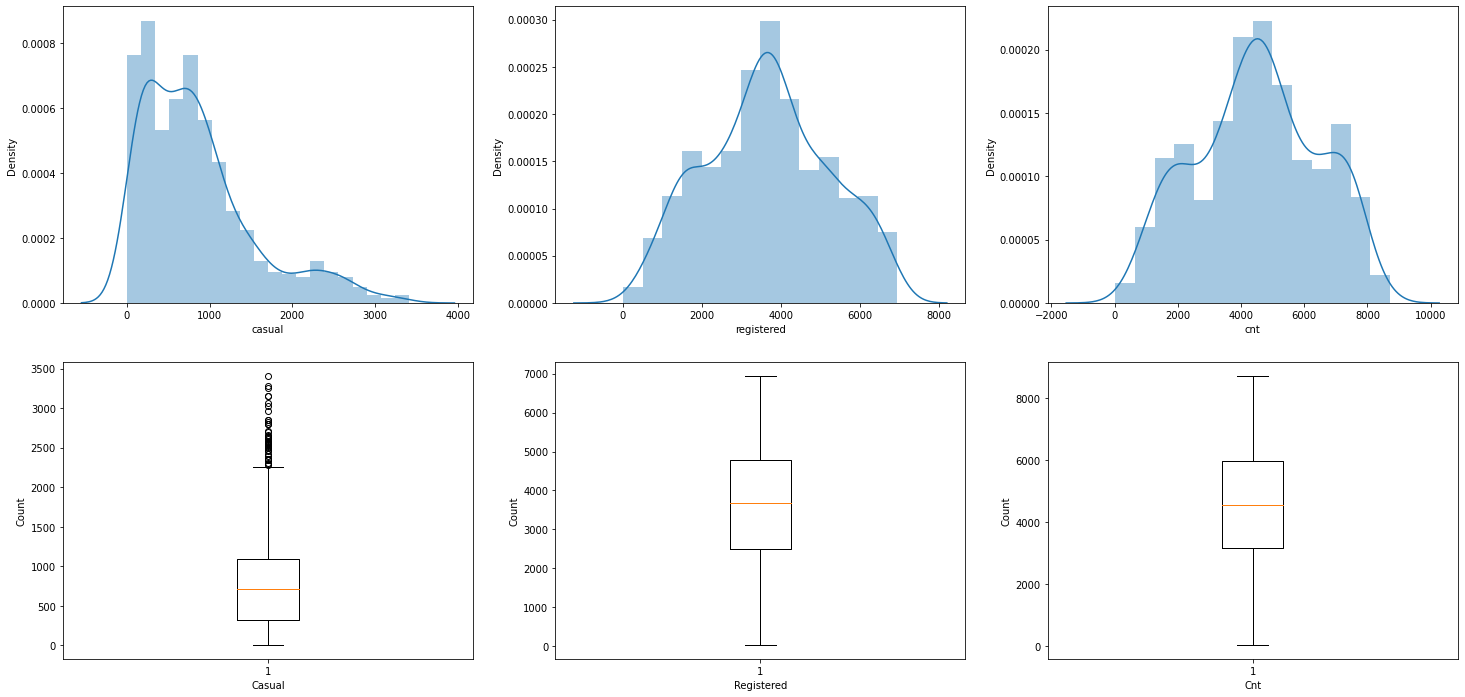

In [145]:
plt.figure(figsize=(25, 12))

plt.subplot(2,3,1)
sns.distplot(a = df["casual"])

plt.subplot(2,3,2)
sns.distplot(a = df.registered)

plt.subplot(2,3,3)
sns.distplot(a = df.cnt)

plt.subplot(2,3,4)
plt.boxplot(df.casual)
plt.xlabel("Casual")
plt.ylabel("Count")

plt.subplot(2,3,5)
plt.boxplot(df.registered)
plt.xlabel("Registered")
plt.ylabel("Count")

plt.subplot(2,3,6)
plt.boxplot(df.cnt)
plt.xlabel("Cnt")
plt.ylabel("Count")


plt.show()

In [146]:
df[["casual", "registered", "cnt"]].corr()

,casual,registered,cnt
casual,1.000000,0.394137,0.672123
registered,0.394137,1.000000,0.945411
cnt,0.672123,0.945411,1.000000


Plot - 1 : Observation

1.   We can see the distribution of the count and it is evident from the graph that "cnt distribution is influenced by "Casual" and "Registered" columns.
2.   We also see strong correlation between the 3 columns i.e "cnt", "Casual" and "registered".
3.   We can see in the boxplot how the mean, Inter quartile range (IQR) and the 25th and 75th percentile are distributed for the respective column.

### Plot - 2

understanding the temperature column i.e temp and atemp

In [147]:
df[["temp", "atemp"]].corr()

,temp,atemp
temp,1.000000,0.991696
atemp,0.991696,1.000000


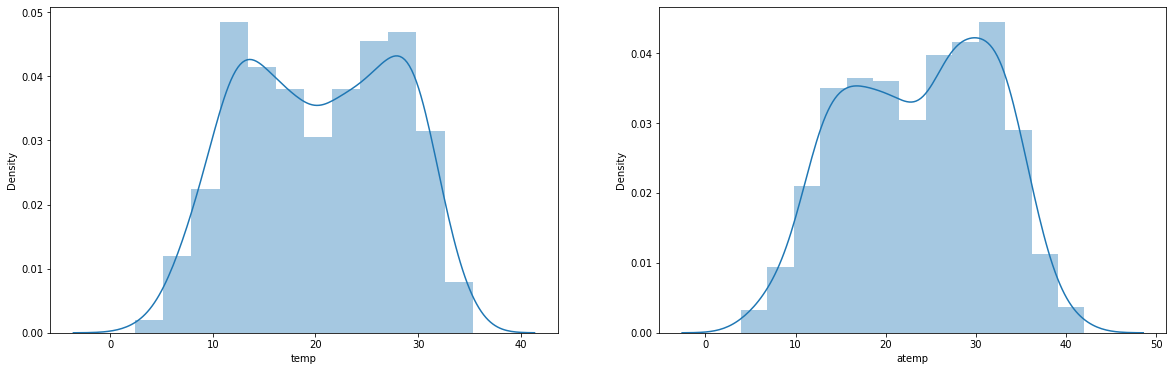

In [148]:
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
sns.distplot(a = df.temp)

plt.subplot(1,2,2)
sns.distplot(a = df.atemp)

plt.show()

Plot - 2 : Observation

1.   Both "temp" and "atemp" show very high degree of correlation to the tune of 99% - so we can proceed with any one column
2.   We can also see that the distribution of the data is consistent to a large extent



### Plot - 3 

Correlation of df DataFrame

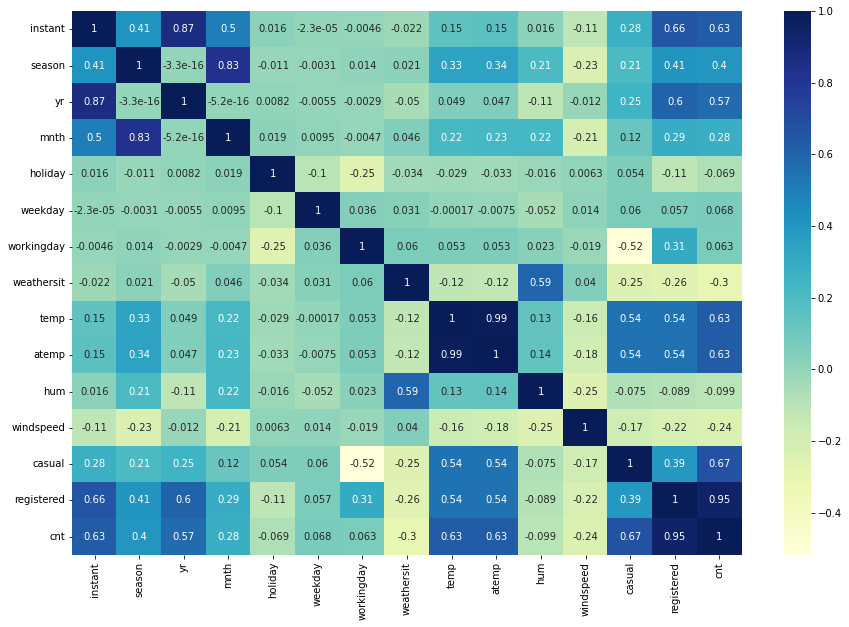

In [149]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")
plt.show()

Plot - 3 : Observation

1. We see strong correlations between various columns.
2. We would remove the columns which are redundant basis the correlation and take the stronger correlated columns for building our model.



### Plot - 4

Continuous numeric variables

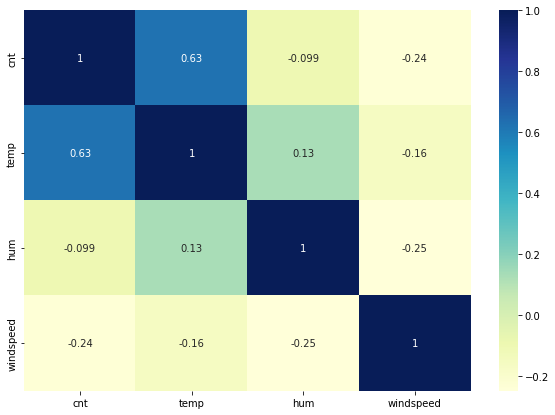

In [150]:
df_subset_cont_num = df[['cnt','temp', 'hum', 'windspeed']]

plt.figure(figsize = (10,7))
sns.heatmap(df_subset_cont_num.corr(), annot = True, cmap = "YlGnBu")
plt.show()

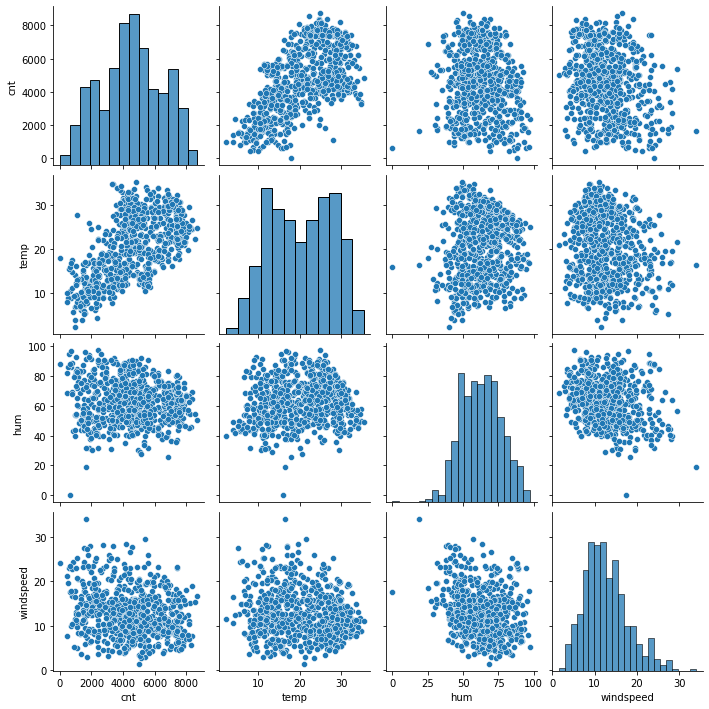

In [151]:
sns.pairplot(df_subset_cont_num)
plt.show()

In [152]:
df_subset_cont_num.describe()

,cnt,temp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,4508.006849,20.319259,62.765175,12.763620
std,1936.011647,7.506729,14.237589,5.195841
min,22.000000,2.424346,0.000000,1.500244
25%,3169.750000,13.811885,52.000000,9.041650
50%,4548.500000,20.465826,62.625000,12.125325
75%,5966.000000,26.880615,72.989575,15.625589
max,8714.000000,35.328347,97.250000,34.000021


Plot - 4 : Observation

1. We observe a cvertain level of correlation between cnt and temp variables.
2. The mean and median are closely associates, so they are symmetrically distributed.

### Plot - 5

Categorical Variables

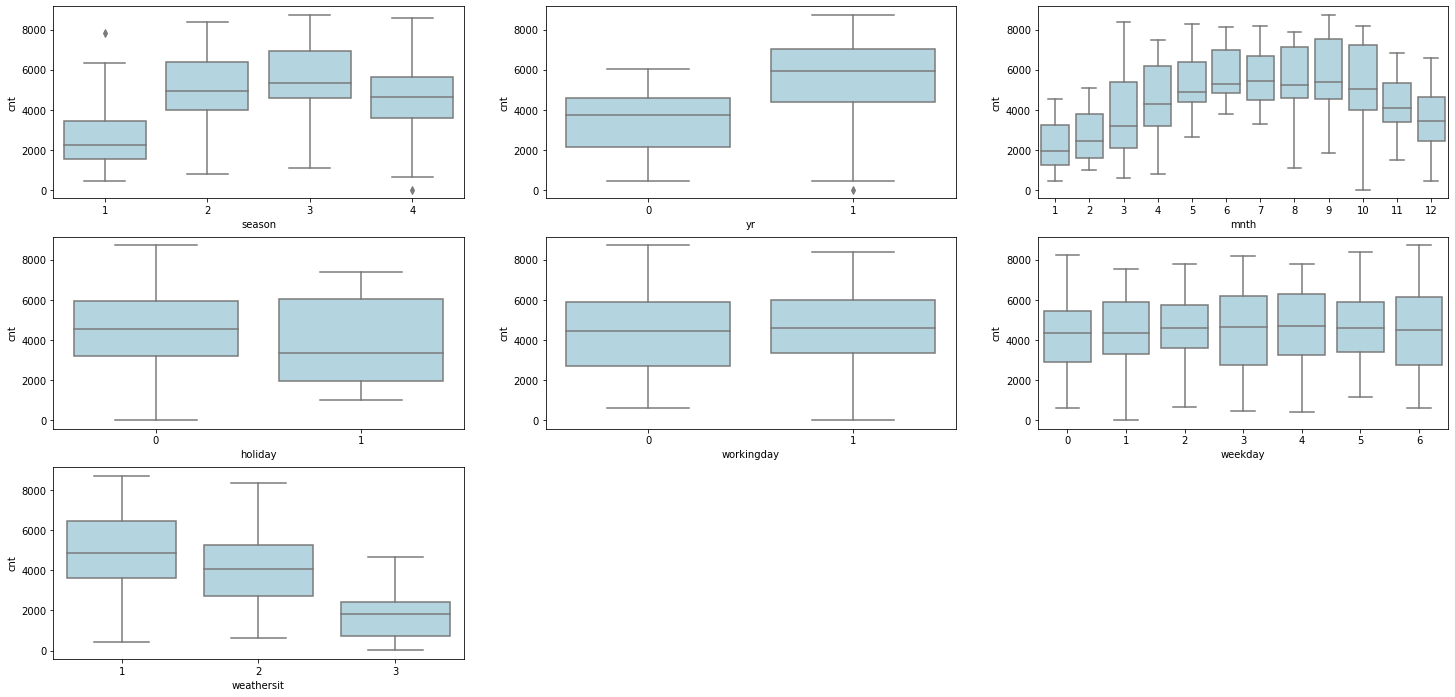

In [153]:
plt.figure(figsize = (25,12))

plt.subplot(3,3,1)
sns.boxplot(data = df, x = df.season , y = df.cnt, color = "lightblue") 

plt.subplot(3,3,2)
sns.boxplot(data = df, x = df.yr, y = df.cnt, color = "lightblue")

plt.subplot(3,3,3)
sns.boxplot(data = df, x = df.mnth, y = df.cnt, color = "lightblue")

plt.subplot(3,3,4)
sns.boxplot(data = df, x = df.holiday, y = df.cnt, color = "lightblue")

plt.subplot(3,3,5)
sns.boxplot(data = df, x = df.workingday, y = df.cnt, color = "lightblue")

plt.subplot(3,3,6)
sns.boxplot(data = df, x = df.weekday, y = df.cnt, color = "lightblue")

plt.subplot(3,3,7)
sns.boxplot(data = df, x = df.weathersit, y = df.cnt, color = "lightblue")

plt.show()

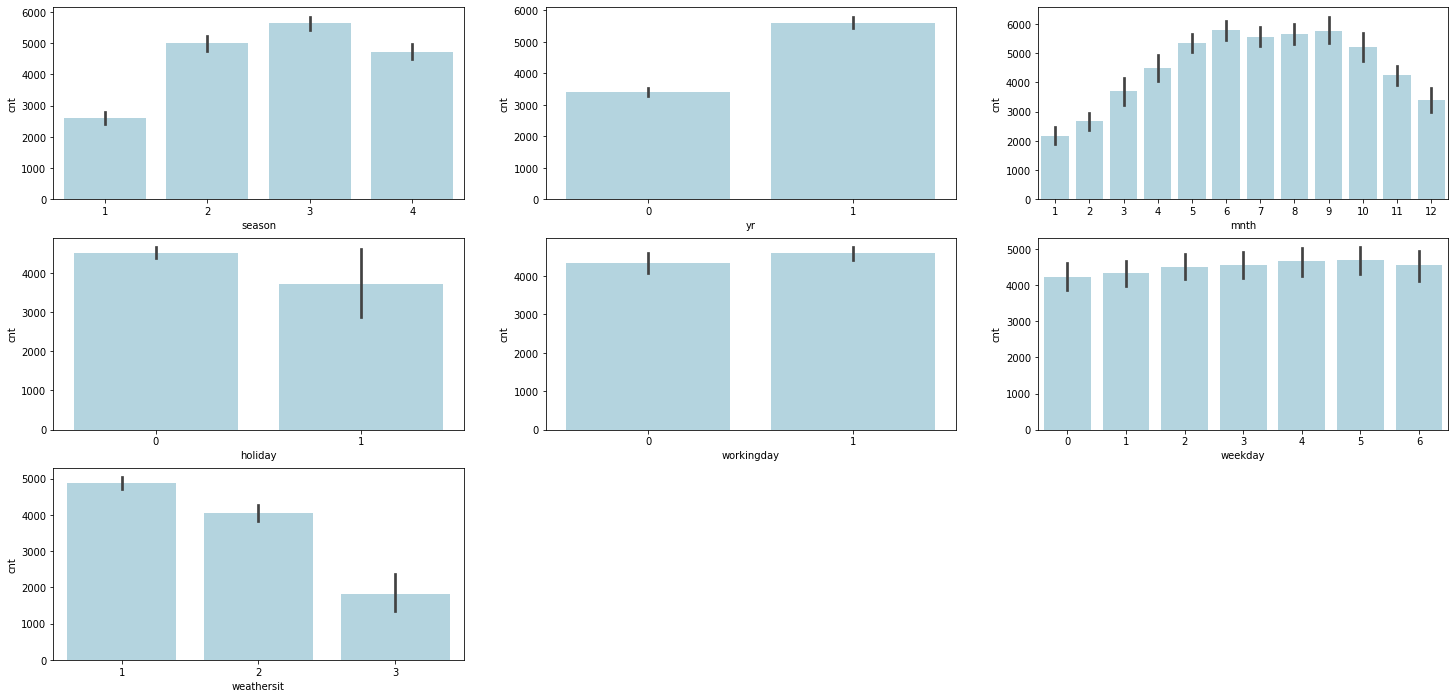

In [154]:
plt.figure(figsize = (25,12))

plt.subplot(3,3,1)
sns.barplot(data = df, x = df.season , y = df.cnt, color = "lightblue")

plt.subplot(3,3,2)
sns.barplot(data = df, x = df.yr, y = df.cnt, color = "lightblue")

plt.subplot(3,3,3)
sns.barplot(data = df, x = df.mnth, y = df.cnt, color = "lightblue")

plt.subplot(3,3,4)
sns.barplot(data = df, x = df.holiday, y = df.cnt, color = "lightblue")

plt.subplot(3,3,5)
sns.barplot(data = df, x = df.workingday, y = df.cnt, color = "lightblue")

plt.subplot(3,3,6)
sns.barplot(data = df, x = df.weekday, y = df.cnt, color = "lightblue")

plt.subplot(3,3,7)
sns.barplot(data = df, x = df.weathersit, y = df.cnt, color = "lightblue")

plt.show()

Plot - 5 : Observation

1. In the "season" plot, we can see that the total number of ride requested are higher in 2,3,4. With season "3", accounitng for the max requests.
2. In "mnth" plot, we can see a pattern emerge in the total number of rides  requested. There is a steady increase for the first 6 months and the demand stabilizes between 6th to 9th months and a drop in demand from 10th to 12th month.
3. In "yr" plot, the year 2019 has registered a steady increase in the number of rides in comparision to the previous year i.e. 2018.
4. In "weathersit", we can see the number rides booked when the weather is nice/pleasent is more in comparision to when the wether situation deteriorated.
5. In "holiday", we can see a drop in number of rides on the holidays to non-holiday days.
6. In "Workingday", the number of rides on the days which are not weekend or holiday is more in comparosion to the rides requested on a holiday or a weekend put together. But the difference is not very significant.
7. In "weekday", the demand raises consistently across the week and stabilizes in the second half of the week.

# Model 1

## Feature Engineering - Model 1

In [155]:
# dropping the variables which are not required 

df.drop(["instant", "dteday", "casual", "registered", "atemp"], axis = 1, inplace = True)

In [156]:
# Update all the categorical variables with appropriate labels

df.season = df.season.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

df.weathersit = df.weathersit.map({1: 'green', 2: 'yellow', 3: 'orange', 4: 'red'})

df.mnth = df.mnth.map({1: 'january', 2: 'february', 3: 'march', 4: 'april', 5: 'may', 6: 'june', 7: 'july', 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'})

df.weekday = df.weekday.map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})

In [157]:
season_dummies = pd.get_dummies(data = df.season, drop_first = True)

weathersit_dummies = pd.get_dummies(data = df.weathersit, drop_first = True)

mnth_dummies = pd.get_dummies(data = df.mnth, drop_first = True)

weekday_dummies = pd.get_dummies(data = df.weekday, drop_first = True)

In [158]:
df = pd.concat([df, season_dummies, weathersit_dummies, mnth_dummies, weekday_dummies], axis = 1)

In [159]:
df.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1, inplace = True)

In [160]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,orange,yellow,august,december,february,january,july,june,march,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


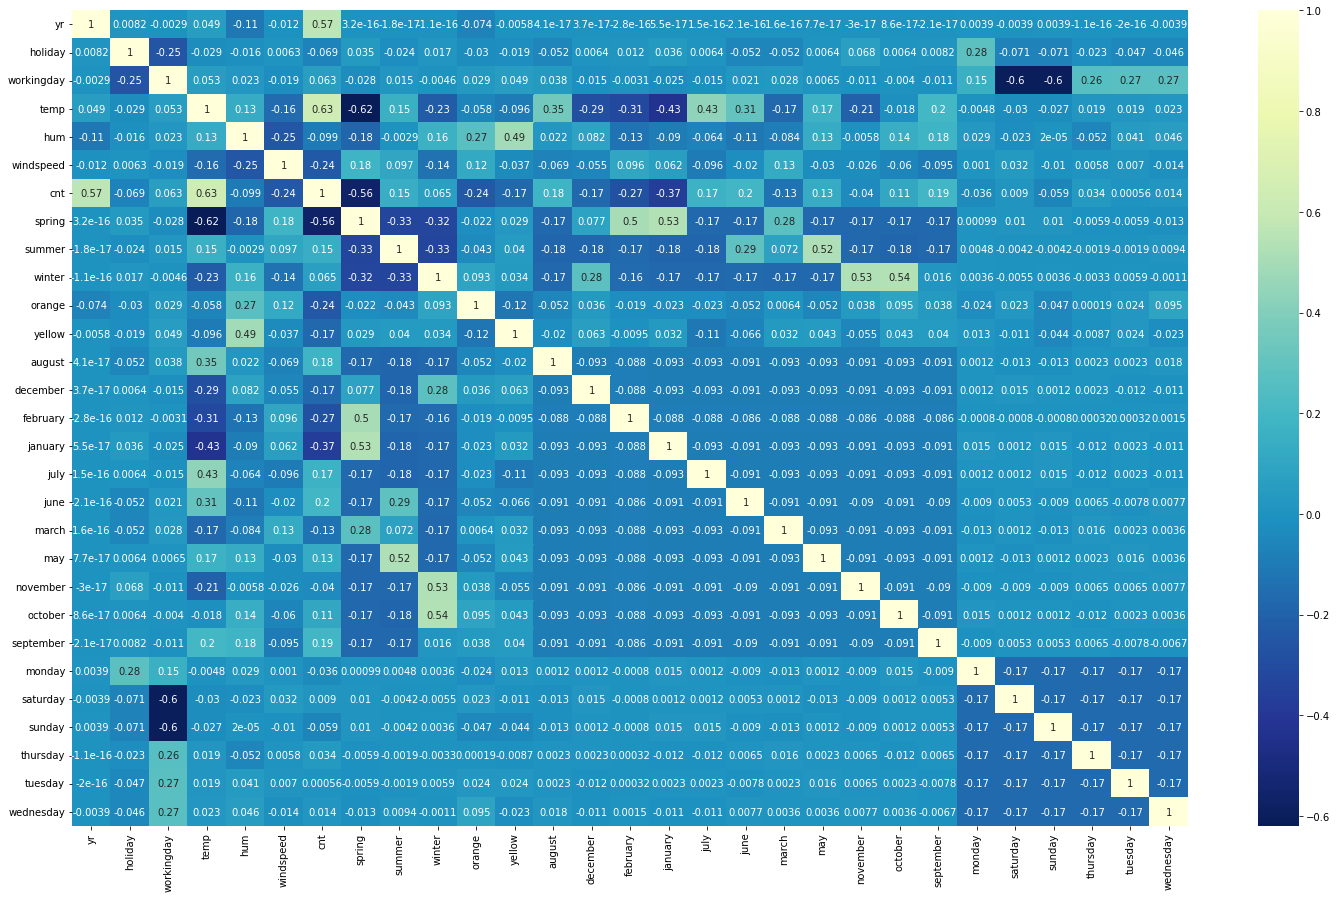

In [161]:
plt.figure(figsize = (25,15))
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu_r")
plt.show()

## Test and Train Data Split

In [162]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

## Scaling the Data

In [163]:
scaler = MinMaxScaler()

In [164]:
var = ["temp", "hum","windspeed"]
df_train[var] = scaler.fit_transform(df_train[var])

In [165]:
X_train = df_train.drop('cnt', axis = 1)
y_train = df_train['cnt']

## Building Regression Model using RFE (Recursive Feature Elimination)

In [166]:
# declaring the model name

lr_d1_first = LinearRegression()
lr_d1_first.fit(X_train, y_train)

LinearRegression()

In [167]:
# RFE
rfe = RFE(estimator = lr_d1_first, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)

In [168]:
col_first = X_train.columns[rfe.support_ == True]

### Iteration - 1

In [169]:
# Selecting the X_train columns dataset as per RFE
X_train_rfe_first = X_train[col_first]

# Adding a constant variables - using Statsmodels

X_train_rfe_first = sm.add_constant(X_train_rfe_first) 

# Creating a model

lr_d1_first = sm.OLS(y_train, X_train_rfe_first)

# model fitting

lr_d1_first = lr_d1_first.fit() 

In [170]:
lr_d1_first.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          5.20e-189
Time:                        21:31:29   Log-Likelihood:                -4100.4
No. Observations:                 510   AIC:                             8241.
Df Residuals:                     490   BIC:                             8325.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2168.6011    262.504      8.261      0.000    1652.830    2684.373
yr          2014.7522     69.227     29.103      0.000    1878.733    2150.771
holiday        7.3869    188.880      0.039      0.969    -363.727     378.501
workingday   818.1484     86.171      9.494      0.000     648.838     987.459
temp        3934.4353    332.129     11.846      0.000    3281.862    4587.008
hum        -1336.8204    326.530     -4.094      0.000   -1978.391    -695.249
windspeed  -1627.6398    220.828     -7.371      0.000   -2061.527   -1193.753
spring      -480.7476    190.184     -2.528      0.012    -854.424    -107.071
summer       256.5098    146.839      1.747      0.081     -32.003     545.022
winter       869.7971    154.814      5.618      0.000     565.616    1173.978
orange     -2215.6609    226.718     -9.773      0.000   -2661.120   -1770.201
yellow      -506.9335     89.638     -5.655      0.000    -683.055    -330.812
december    -423.7628    157.415     -2.692      0.007    -733.055    -114.471
february    -302.1470    185.824     -1.626      0.105    -667.257      62.963
january     -565.4005    184.340     -3.067      0.002    -927.596    -203.205
july        -443.6319    155.971     -2.844      0.005    -750.087    -137.177
may          198.8114    150.043      1.325      0.186     -95.995     493.618
november    -400.4085    163.035     -2.456      0.014    -720.743     -80.074
september    628.4941    144.525      4.349      0.000     344.529     912.459
saturday     908.1228    103.359      8.786      0.000     705.042    1111.204
sunday       434.9429    107.591      4.043      0.000     223.546     646.340
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.033
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                     9.12e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.84e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [171]:
X_train_rfe_first.drop('const', axis = 1, inplace = True)

In [172]:
# VIF 

vif = pd.DataFrame()
vif["features"] = X_train_rfe_first.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe_first.values, i) for i in range(X_train_rfe_first.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,features,VIF
2,workingday,60.98
18,saturday,14.60
19,sunday,13.91
6,spring,5.79
3,temp,4.88
8,winter,3.88
7,summer,3.49
1,holiday,3.43
13,january,2.38
4,hum,1.97


Here we have a variable - "holiday" which has a high p-value and in VIF - "workingday" . But we wilkl first remove high p=Value data and rerun the model.



In [173]:
# Dropped the columns appropriately

X_train_rfe_first.drop('holiday', axis = 1, inplace = True)

In [174]:
X_train_rfe_first.head()

,yr,workingday,temp,hum,windspeed,spring,summer,winter,orange,yellow,december,february,january,july,may,november,september,saturday,sunday
576,1,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,1,0,0,0,0,0,0,0,1
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,1,0,0,0,0,0,0,0,1,0
111,0,1,0.345824,0.751824,0.380981,0,1,0,0,1,0,0,0,0,0,0,0,0,0


Creating a new model with 9 Variables

### Iteration - 2

In [175]:
# Adding Constant

X_train_rfe_first = sm.add_constant(X_train_rfe_first)

# Building a model

lr_d1_first = sm.OLS(y_train, X_train_rfe_first)

lr_d1_first = lr_d1_first.fit()

lr_d1_first.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          5.20e-189
Time:                        21:31:29   Log-Likelihood:                -4100.4
No. Observations:                 510   AIC:                             8241.
Df Residuals:                     490   BIC:                             8325.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2175.9880    393.670      5.527      0.000    1402.499    2949.477
yr          2014.7522     69.227     29.103      0.000    1878.733    2150.771
workingday   810.7615    220.394      3.679      0.000     377.728    1243.795
temp        3934.4353    332.129     11.846      0.000    3281.862    4587.008
hum        -1336.8204    326.530     -4.094      0.000   -1978.391    -695.249
windspeed  -1627.6398    220.828     -7.371      0.000   -2061.527   -1193.753
spring      -480.7476    190.184     -2.528      0.012    -854.424    -107.071
summer       256.5098    146.839      1.747      0.081     -32.003     545.022
winter       869.7971    154.814      5.618      0.000     565.616    1173.978
orange     -2215.6609    226.718     -9.773      0.000   -2661.120   -1770.201
yellow      -506.9335     89.638     -5.655      0.000    -683.055    -330.812
december    -423.7628    157.415     -2.692      0.007    -733.055    -114.471
february    -302.1470    185.824     -1.626      0.105    -667.257      62.963
january     -565.4005    184.340     -3.067      0.002    -927.596    -203.205
july        -443.6319    155.971     -2.844      0.005    -750.087    -137.177
may          198.8114    150.043      1.325      0.186     -95.995     493.618
november    -400.4085    163.035     -2.456      0.014    -720.743     -80.074
september    628.4941    144.525      4.349      0.000     344.529     912.459
saturday     900.7359    233.103      3.864      0.000     442.731    1358.741
sunday       427.5560    234.007      1.827      0.068     -32.225     887.337
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.033
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                         27.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
X_train_rfe_first = X_train_rfe_first.drop('const', axis = 1)

In [177]:
# lets have a look at the VIF and determine as to what action to be taken next

#VIF

vif = pd.DataFrame()
vif["features"] = X_train_rfe_first.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe_first.values, i) for i in range(X_train_rfe_first.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,features,VIF
3,hum,34.75
2,temp,22.48
1,workingday,19.11
5,spring,6.06
17,saturday,5.10
4,windspeed,5.06
18,sunday,4.89
7,winter,4.40
6,summer,3.71
12,january,2.42


As of now the above model looks good adj r value`

In [178]:
# Dropping "may" and checking the regressions model

X_train_rfe_first = X_train_rfe_first.drop('may', axis = 1)

### Iteration - 3

In [179]:
X_train_rfe_first = sm.add_constant(X_train_rfe_first)

lr_d1_first = sm.OLS(y_train, X_train_rfe_first).fit()

lr_d1_first.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          9.80e-190
Time:                        21:31:30   Log-Likelihood:                -4101.3
No. Observations:                 510   AIC:                             8241.
Df Residuals:                     491   BIC:                             8321.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2080.2334    387.278      5.371      0.000    1319.308    2841.159
yr          2009.6968     69.175     29.052      0.000    1873.781    2145.613
workingday   818.7000    220.482      3.713      0.000     385.496    1251.904
temp        4011.9151    327.193     12.262      0.000    3369.044    4654.786
hum        -1283.3974    324.280     -3.958      0.000   -1920.545    -646.249
windspeed  -1642.3413    220.719     -7.441      0.000   -2076.011   -1208.671
spring      -447.6574    188.682     -2.373      0.018    -818.382     -76.933
summer       341.6843    132.123      2.586      0.010      82.088     601.281
winter       887.7713    154.337      5.752      0.000     584.528    1191.014
orange     -2231.4907    226.577     -9.849      0.000   -2676.671   -1786.310
yellow      -508.4284     89.699     -5.668      0.000    -684.670    -332.186
december    -411.9244    157.282     -2.619      0.009    -720.954    -102.895
february    -290.1504    185.746     -1.562      0.119    -655.105      74.805
january     -550.9019    184.157     -2.991      0.003    -912.735    -189.069
july        -447.6168    156.062     -2.868      0.004    -754.249    -140.984
november    -386.0343    162.799     -2.371      0.018    -705.903     -66.166
september    628.5661    144.636      4.346      0.000     344.384     912.748
saturday     903.9506    233.270      3.875      0.000     445.620    1362.281
sunday       434.3776    234.130      1.855      0.064     -25.644     894.399
==============================================================================
Omnibus:                       80.597   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.714
Skew:                          -0.784   Prob(JB):                     3.91e-47
Kurtosis:                       5.757   Cond. No.                         27.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
X_train_rfe_first = X_train_rfe_first.drop('const', axis = 1)

In [181]:
# lets have a look at the VIF and determine as to what action to be taken next

#VIF

vif = pd.DataFrame()
vif["features"] = X_train_rfe_first.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe_first.values, i) for i in range(X_train_rfe_first.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,features,VIF
3,hum,34.64
2,temp,22.30
1,workingday,18.92
5,spring,6.05
16,saturday,5.04
4,windspeed,4.99
17,sunday,4.85
7,winter,4.40
6,summer,3.11
12,january,2.42


In [182]:
X_train_rfe_first.head()

,yr,workingday,temp,hum,windspeed,spring,summer,winter,orange,yellow,december,february,january,july,november,september,saturday,sunday
576,1,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,1,0,0,0,0,0,0,1
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,1,0,0,0,0,0,0,1,0
111,0,1,0.345824,0.751824,0.380981,0,1,0,0,1,0,0,0,0,0,0,0,0


In [183]:
X_train_rfe_first = X_train_rfe_first.drop('february', axis = 1)

### Iteration - 4

In [184]:
X_train_rfe_first = sm.add_constant(X_train_rfe_first)

lr_d1_first = sm.OLS(y_train, X_train_rfe_first).fit()

lr_d1_first.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          2.52e-190
Time:                        21:31:30   Log-Likelihood:                -4102.6
No. Observations:                 510   AIC:                             8241.
Df Residuals:                     492   BIC:                             8317.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1964.9204    380.733      5.161      0.000    1216.857    2712.983
yr          2006.7741     69.251     28.978      0.000    1870.710    2142.839
workingday   838.0092    220.457      3.801      0.000     404.856    1271.162
temp        4141.2475    317.007     13.064      0.000    3518.393    4764.102
hum        -1298.8614    324.603     -4.001      0.000   -1936.641    -661.082
windspeed  -1632.9048    220.959     -7.390      0.000   -2067.044   -1198.765
spring      -527.3663    181.917     -2.899      0.004    -884.796    -169.936
summer       368.5735    131.189      2.809      0.005     110.814     626.333
winter       901.8262    154.300      5.845      0.000     598.658    1204.995
orange     -2220.6429    226.802     -9.791      0.000   -2666.263   -1775.023
yellow      -506.3128     89.820     -5.637      0.000    -682.791    -329.834
december    -337.2953    150.070     -2.248      0.025    -632.152     -42.438
january     -395.6938    155.280     -2.548      0.011    -700.787     -90.601
july        -455.5673    156.207     -2.916      0.004    -762.483    -148.651
november    -346.5624    161.061     -2.152      0.032    -663.015     -30.110
september    640.7778    144.636      4.430      0.000     356.598     924.958
saturday     928.5926    233.076      3.984      0.000     470.645    1386.540
sunday       452.1676    234.195      1.931      0.054      -7.979     912.314
==============================================================================
Omnibus:                       76.194   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.529
Skew:                          -0.745   Prob(JB):                     2.85e-44
Kurtosis:                       5.687   Cond. No.                         26.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
X_train_rfe_first = X_train_rfe_first.drop('const', axis = 1)

In [186]:
# lets have a look at the VIF and determine as to what action to be taken next

#VIF

vif = pd.DataFrame()
vif["features"] = X_train_rfe_first.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe_first.values, i) for i in range(X_train_rfe_first.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,features,VIF
3,hum,34.19
2,temp,21.56
1,workingday,18.84
5,spring,5.06
15,saturday,5.03
4,windspeed,4.99
16,sunday,4.83
7,winter,4.40
6,summer,3.09
9,yellow,2.35


In [187]:
# VIF value for "hum" is greater than 5, so we will go ahead and drop one variable after another

X_train_rfe_first = X_train_rfe_first.drop('hum', axis = 1)

### Iteration - 5

In [188]:
X_train_rfe_first = sm.add_constant(X_train_rfe_first)

lr_d1_first = sm.OLS(y_train, X_train_rfe_first).fit()

lr_d1_first.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.6
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          4.83e-188
Time:                        21:31:30   Log-Likelihood:                -4110.7
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     493   BIC:                             8327.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1362.3847    354.973      3.838      0.000     664.938    2059.832
yr          2039.5053     69.805     29.217      0.000    1902.352    2176.658
workingday   845.0719    223.781      3.776      0.000     405.390    1284.754
temp        3798.1146    309.799     12.260      0.000    3189.425    4406.805
windspeed  -1392.7225    215.863     -6.452      0.000   -1816.847    -968.598
spring      -606.5334    183.570     -3.304      0.001    -967.210    -245.857
summer       309.4518    132.324      2.339      0.020      49.464     569.440
winter       783.0878    153.708      5.095      0.000     481.085    1085.091
orange     -2586.5549    210.685    -12.277      0.000   -3000.507   -2172.603
yellow      -713.8497     74.440     -9.590      0.000    -860.109    -567.591
december    -398.1764    151.553     -2.627      0.009    -695.945    -100.408
january     -449.6909    157.030     -2.864      0.004    -758.221    -141.161
july        -412.6656    158.194     -2.609      0.009    -723.483    -101.848
november    -353.4801    163.485     -2.162      0.031    -674.694     -32.266
september    586.0082    146.162      4.009      0.000     298.830     873.186
saturday     951.3057    236.528      4.022      0.000     486.579    1416.033
sunday       433.0689    237.685      1.822      0.069     -33.931     900.069
==============================================================================
Omnibus:                       79.557   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.036
Skew:                          -0.766   Prob(JB):                     1.23e-47
Kurtosis:                       5.796   Cond. No.                         24.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
X_train_rfe_first = X_train_rfe_first.drop('const', axis = 1) 

In [190]:
# lets have a look at the VIF and determine as to what action to be taken next

#VIF

vif = pd.DataFrame()
vif["features"] = X_train_rfe_first.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe_first.values, i) for i in range(X_train_rfe_first.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,features,VIF
1,workingday,17.17
2,temp,13.62
3,windspeed,4.85
14,saturday,4.70
15,sunday,4.39
4,spring,4.24
6,winter,3.71
5,summer,2.78
0,yr,2.08
12,november,1.80


In [191]:
# removing "sunday" as its pvalue is above 0.05 and basis the outcome, we will proceed further

X_train_rfe_first = X_train_rfe_first.drop('sunday', axis = 1) 

### Iteration - 6

In [192]:
X_train_rfe_first = sm.add_constant(X_train_rfe_first)

lr_d1_first = sm.OLS(y_train, X_train_rfe_first).fit()

lr_d1_first.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          1.84e-188
Time:                        21:31:30   Log-Likelihood:                -4112.4
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     494   BIC:                             8325.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1747.1024    286.016      6.108      0.000    1185.145    2309.060
yr          2041.0428     69.964     29.173      0.000    1903.579    2178.507
workingday   475.6851     94.969      5.009      0.000     289.092     662.278
temp        3784.4742    310.435     12.191      0.000    3174.538    4394.411
windspeed  -1398.4402    216.346     -6.464      0.000   -1823.512    -973.368
spring      -619.8050    183.856     -3.371      0.001    -981.041    -258.569
summer       307.6417    132.630      2.320      0.021      47.053     568.231
winter       784.6865    154.066      5.093      0.000     481.982    1087.391
orange     -2580.7994    211.156    -12.222      0.000   -2995.673   -2165.925
yellow      -710.6033     74.593     -9.526      0.000    -857.162    -564.044
december    -406.1887    151.844     -2.675      0.008    -704.528    -107.849
january     -457.1516    157.344     -2.905      0.004    -766.298    -148.005
july        -404.7787    158.505     -2.554      0.011    -716.207     -93.351
november    -388.6786    162.721     -2.389      0.017    -708.389     -68.968
september    566.9916    146.131      3.880      0.000     279.877     854.107
saturday     582.1713    122.355      4.758      0.000     341.771     822.572
==============================================================================
Omnibus:                       85.035   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.570
Skew:                          -0.805   Prob(JB):                     9.50e-53
Kurtosis:                       5.946   Cond. No.                         21.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [193]:
X_train_rfe_first = X_train_rfe_first.drop('const', axis = 1) 

In [194]:
# lets have a look at the VIF and determine as to what action to be taken next

#VIF

vif = pd.DataFrame()
vif["features"] = X_train_rfe_first.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe_first.values, i) for i in range(X_train_rfe_first.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,features,VIF
2,temp,6.92
1,workingday,4.74
3,windspeed,4.71
4,spring,3.09
6,winter,3.03
5,summer,2.33
0,yr,2.08
14,saturday,1.86
12,november,1.79
10,january,1.67


In [195]:
# All the p-values are under 0.05 significance limit, so we will be dropping the variable basis the VIF i.e. "temp"

In [196]:
X_train_rfe_first = X_train_rfe_first.drop('temp', axis = 1)

### Iteration - 7

In [197]:
X_train_rfe_first = sm.add_constant(X_train_rfe_first)

In [198]:
lr_d1_first = sm.OLS(y_train,X_train_rfe_first).fit()

lr_d1_first.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.3
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          1.73e-161
Time:                        21:31:30   Log-Likelihood:                -4179.5
No. Observations:                 510   AIC:                             8389.
Df Residuals:                     495   BIC:                             8453.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4761.2557    163.827     29.063      0.000    4439.374    5083.138
yr          2137.4998     79.205     26.987      0.000    1981.880    2293.119
workingday   488.6702    108.200      4.516      0.000     276.082     701.259
windspeed  -1669.0912    245.202     -6.807      0.000   -2150.856   -1187.326
spring     -2162.0242    152.011    -14.223      0.000   -2460.690   -1863.359
summer      -421.7045    134.870     -3.127      0.002    -686.693    -156.716
winter      -162.0228    151.610     -1.069      0.286    -459.902     135.856
orange     -2756.0327    240.031    -11.482      0.000   -3227.638   -2284.427
yellow      -771.0716     84.803     -9.093      0.000    -937.690    -604.454
december    -972.9484    164.701     -5.907      0.000   -1296.548    -649.348
january    -1061.2655    170.154     -6.237      0.000   -1395.578    -726.953
july        -129.6861    178.760     -0.725      0.469    -480.909     221.537
november    -901.3781    179.104     -5.033      0.000   -1253.275    -549.481
september    437.2485    166.058      2.633      0.009     110.982     763.515
saturday     573.4184    139.408      4.113      0.000     299.514     847.323
==============================================================================
Omnibus:                       67.046   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.024
Skew:                          -0.666   Prob(JB):                     4.42e-38
Kurtosis:                       5.515   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
X_train_rfe_first = X_train_rfe_first.drop('const', axis = 1) 

In [200]:
# lets have a look at the VIF and determine as to what action to be taken next

#VIF

vif = pd.DataFrame()
vif["features"] = X_train_rfe_first.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe_first.values, i) for i in range(X_train_rfe_first.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,features,VIF
2,windspeed,4.26
1,workingday,3.56
3,spring,3.03
5,winter,3.01
4,summer,2.27
0,yr,1.91
11,november,1.78
9,january,1.64
13,saturday,1.63
7,yellow,1.57


In [201]:
# We see high correlation with "july" and "temp", so we will remove july and rerun the model and add "temp"

X_train_rfe_first = X_train_rfe_first.drop('july', axis = 1) 

### Iteration - 8

In [202]:
X_train_rfe_first = sm.add_constant(X_train_rfe_first)

lr_d1_first = sm.OLS(y_train, X_train_rfe_first).fit()

lr_d1_first.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.2
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          1.80e-162
Time:                        21:31:30   Log-Likelihood:                -4179.8
No. Observations:                 510   AIC:                             8388.
Df Residuals:                     496   BIC:                             8447.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4710.9483    148.357     31.754      0.000    4419.464    5002.433
yr          2138.0214     79.164     27.007      0.000    1982.483    2293.560
workingday   491.1630    108.094      4.544      0.000     278.784     703.542
windspeed  -1667.9496    245.080     -6.806      0.000   -2149.472   -1186.427
spring     -2116.1116    138.144    -15.318      0.000   -2387.532   -1844.691
summer      -375.5755    118.884     -3.159      0.002    -609.154    -141.997
winter      -121.1731    140.699     -0.861      0.390    -397.613     155.266
orange     -2757.1233    239.912    -11.492      0.000   -3228.492   -2285.754
yellow      -766.9102     84.568     -9.069      0.000    -933.066    -600.754
december    -968.8915    164.528     -5.889      0.000   -1292.149    -645.634
january    -1061.1426    170.072     -6.239      0.000   -1395.293    -726.992
november    -895.4920    178.834     -5.007      0.000   -1246.858    -544.126
september    474.4431    157.870      3.005      0.003     164.266     784.620
saturday     574.4895    139.334      4.123      0.000     300.733     848.246
==============================================================================
Omnibus:                       67.168   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.757
Skew:                          -0.670   Prob(JB):                     8.33e-38
Kurtosis:                       5.498   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
X_train_rfe_first = X_train_rfe_first.drop('const', axis = 1)

In [204]:
# lets have a look at the VIF and determine as to what action to be taken next

#VIF

vif = pd.DataFrame()
vif["features"] = X_train_rfe_first.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe_first.values, i) for i in range(X_train_rfe_first.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,features,VIF
2,windspeed,4.08
1,workingday,3.31
5,winter,2.84
3,spring,2.77
4,summer,2.00
0,yr,1.88
10,november,1.78
9,january,1.64
7,yellow,1.57
12,saturday,1.57


In [205]:
X_train_rfe_first = pd.concat([X_train_rfe_first, X_train['temp']], axis = 1)

### Iteration - 9

In [206]:
X_train_rfe_first = sm.add_constant(X_train_rfe_first)

lr_d1_first = sm.OLS(y_train, X_train_rfe_first).fit()

lr_d1_first.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.9
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          3.30e-188
Time:                        21:31:31   Log-Likelihood:                -4115.8
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     495   BIC:                             8325.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1683.1532    286.502      5.875      0.000    1120.243    2246.063
yr          2045.5144     70.331     29.084      0.000    1907.330    2183.699
workingday   483.6952     95.445      5.068      0.000     296.167     671.223
windspeed  -1403.0208    217.542     -6.449      0.000   -1830.440    -975.601
spring      -525.3983    181.103     -2.901      0.004    -881.223    -169.573
summer       426.9514    124.819      3.421      0.001     181.710     672.193
winter       881.3701    150.172      5.869      0.000     586.317    1176.423
orange     -2589.3602    212.303    -12.197      0.000   -3006.487   -2172.233
yellow      -699.6813     74.885     -9.343      0.000    -846.812    -552.550
december    -410.6851    152.678     -2.690      0.007    -710.663    -110.708
january     -474.7918    158.067     -3.004      0.003    -785.356    -164.227
november    -385.9689    163.622     -2.359      0.019    -707.449     -64.489
september    676.8619    140.431      4.820      0.000     400.948     952.776
saturday     585.1858    123.030      4.756      0.000     343.461     826.911
temp        3671.6129    308.982     11.883      0.000    3064.534    4278.692
==============================================================================
Omnibus:                       88.605   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.625
Skew:                          -0.848   Prob(JB):                     2.06e-53
Kurtosis:                       5.922   Cond. No.                         21.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
X_train_rfe_first = X_train_rfe_first.drop('const', axis = 1)

In [208]:
# lets have a look at the VIF and determine as to what action to be taken next

#VIF

vif = pd.DataFrame()
vif["features"] = X_train_rfe_first.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe_first.values, i) for i in range(X_train_rfe_first.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,features,VIF
13,temp,5.61
1,workingday,4.74
2,windspeed,4.71
3,spring,2.96
5,winter,2.85
0,yr,2.07
4,summer,2.00
12,saturday,1.86
10,november,1.79
9,january,1.66


In [209]:
X_train_rfe_first = X_train_rfe_first.drop('workingday', axis = 1)

### Iteration - 10

In [210]:
X_train_rfe_first = sm.add_constant(X_train_rfe_first)

lr_d1_first = sm.OLS(y_train, X_train_rfe_first).fit()

lr_d1_first.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     191.9
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          6.03e-184
Time:                        21:31:31   Log-Likelihood:                -4128.7
No. Observations:                 510   AIC:                             8285.
Df Residuals:                     496   BIC:                             8345.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2067.9872    283.045      7.306      0.000    1511.871    2624.103
yr          2050.3659     72.053     28.456      0.000    1908.799    2191.933
windspeed  -1416.3201    222.873     -6.355      0.000   -1854.211    -978.429
spring      -547.1634    185.502     -2.950      0.003    -911.630    -182.697
summer       427.6628    127.887      3.344      0.001     176.395     678.930
winter       849.4254    153.728      5.526      0.000     547.388    1151.463
orange     -2522.3301    217.099    -11.618      0.000   -2948.877   -2095.783
yellow      -672.7437     76.532     -8.790      0.000    -823.110    -522.377
december    -395.3251    156.400     -2.528      0.012    -702.614     -88.037
january     -469.5975    161.949     -2.900      0.004    -787.787    -151.408
november    -402.9500    167.609     -2.404      0.017    -732.261     -73.639
september    677.0223    143.882      4.705      0.000     394.328     959.716
saturday     198.3200     98.853      2.006      0.045       4.097     392.543
temp        3681.9232    316.570     11.631      0.000    3059.940    4303.907
==============================================================================
Omnibus:                       89.324   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.725
Skew:                          -0.887   Prob(JB):                     4.32e-49
Kurtosis:                       5.708   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
X_train_rfe_first_new = X_train_rfe_first.drop('const', axis = 1)

In [212]:
# lets have a look at the VIF and determine as to what action to be taken next

#VIF

vif = pd.DataFrame()
vif["features"] = X_train_rfe_first_new.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe_first_new.values, i) for i in range(X_train_rfe_first_new.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,features,VIF
1,windspeed,4.68
12,temp,3.91
4,winter,2.77
2,spring,2.75
0,yr,2.07
3,summer,1.91
9,november,1.79
8,january,1.65
6,yellow,1.56
7,december,1.47


## Analysis

In [213]:
y_train_rfe_first_pred = lr_d1_first.predict(X_train_rfe_first)

In [214]:
res = y_train - y_train_rfe_first_pred

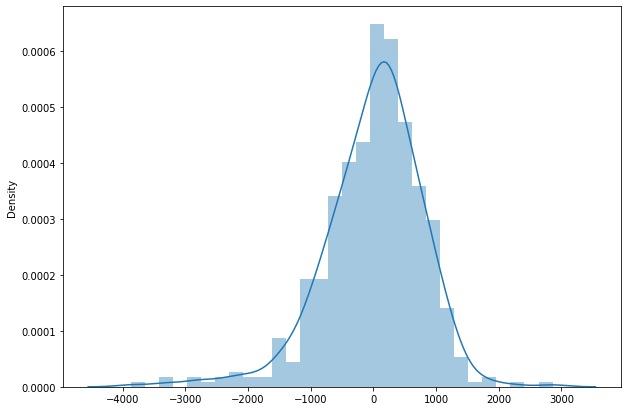

In [215]:
plt.figure(figsize = (10,7))
sns.distplot(res)
plt.show()

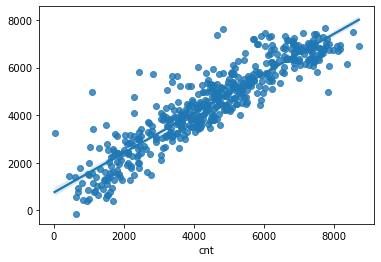

In [216]:
# Linear regression plot on train dataset

sns.regplot(y_train,y_train_rfe_first_pred,'r')
plt.show()

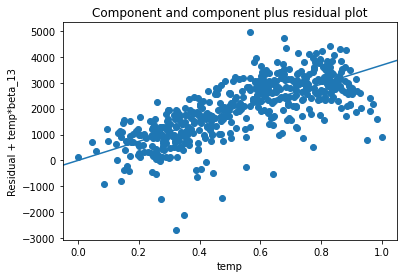

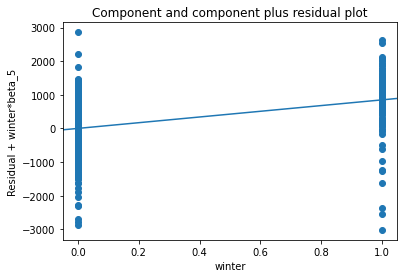

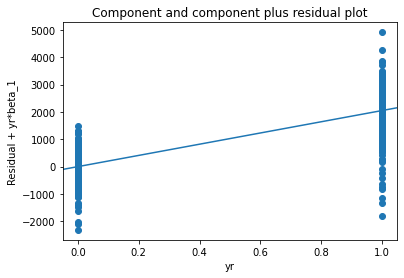

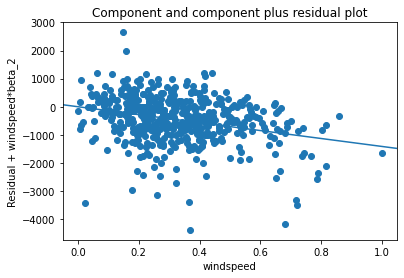

In [285]:

sm.graphics.plot_ccpr(lr_d1_first, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_d1_first, 'winter')
plt.show()

sm.graphics.plot_ccpr(lr_d1_first, 'yr')
plt.show()

sm.graphics.plot_ccpr(lr_d1_first, 'windspeed')
plt.show()

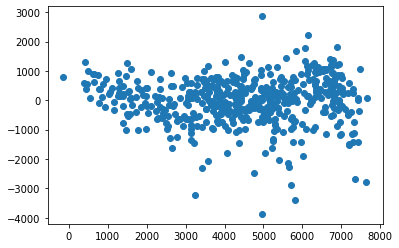

In [218]:
# Homosedasticity

plt.scatter(y_train_rfe_first_pred, res)
plt.show()

In [219]:
X_train_rfe_first_new.head()

,yr,windspeed,spring,summer,winter,orange,yellow,december,january,november,september,saturday,temp
576,1,0.264686,0,0,0,0,0,0,0,0,0,0,0.815169
426,1,0.255342,1,0,0,0,1,0,0,0,0,1,0.442393
728,1,0.663106,1,0,0,0,0,1,0,0,0,0,0.245101
482,1,0.188475,0,1,0,0,1,0,0,0,0,1,0.395666
111,0,0.380981,0,1,0,0,1,0,0,0,0,0,0.345824


## Scaling on test set


In [220]:
var = ["temp", "hum","windspeed"]
df_test[var] = scaler.transform(df_test[var])

In [221]:
X_test = df_test.drop('cnt', axis = 1)
y_test = df_test['cnt']

## Model Evaluation


In [222]:
X_test_rfe_first = X_test[X_train_rfe_first_new.columns]

X_test_rfe_first = sm.add_constant(X_test_rfe_first)

In [223]:
y_test_rfe_first_pred = lr_d1_first.predict(X_test_rfe_first)

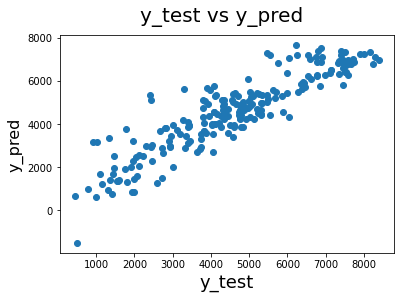

In [224]:
fig = plt.figure()
plt.scatter(y_test,y_test_rfe_first_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  
plt.show()

In [225]:
r2_score(y_test, y_test_rfe_first_pred )

0.8105567114723067

In [226]:
# Residual Analysis

res1 = y_test - y_test_rfe_first_pred

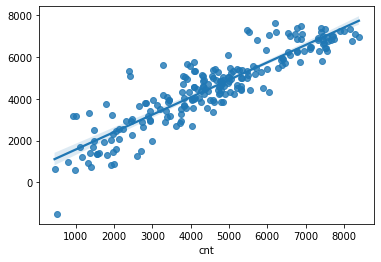

In [227]:
sns.regplot(y_test,y_test_rfe_first_pred,'r')
plt.show()

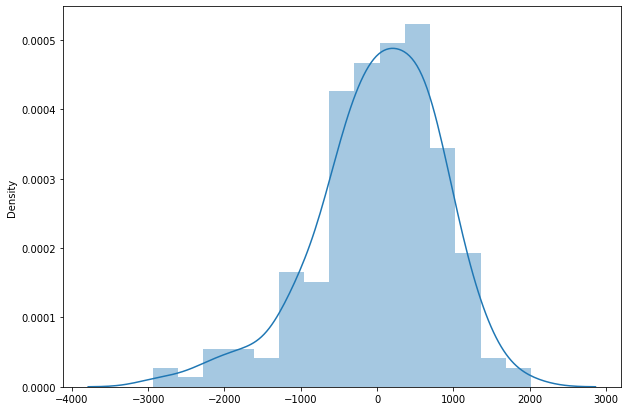

In [228]:
plt.figure(figsize = (10,7))
sns.distplot(res1)
plt.show()

In [229]:
np.mean(res1)

17.66403613902759

In [230]:
np.median(res1)

108.41815989003453

In [231]:
# Multicollinearity

#VIF

X_test_rfe_first = X_test_rfe_first.drop('const', axis = 1)

vif = pd.DataFrame()
vif["features"] = X_test_rfe_first.columns
vif["VIF"] = [variance_inflation_factor(X_test_rfe_first.values, i) for i in range(X_test_rfe_first.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,features,VIF
1,windspeed,5.06
12,temp,4.39
2,spring,2.62
4,winter,2.39
0,yr,2.04
3,summer,1.96
9,november,1.66
6,yellow,1.64
8,january,1.58
7,december,1.46


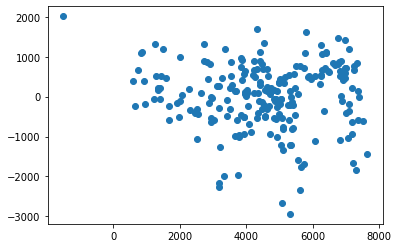

In [232]:
# Homoscedasticity

plt.scatter(y_test_rfe_first_pred, res1)
plt.show()

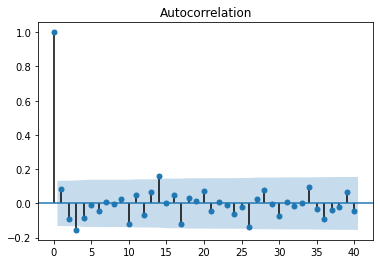

In [233]:
# No - Autocorrelations of the residues

sm.graphics.tsa.plot_acf(res1, lags=40)
plt.show()

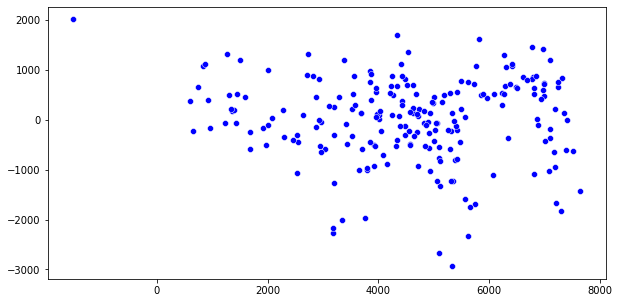

In [234]:
plt.figure(figsize=(10,5))
sns.scatterplot(y_test_rfe_first_pred,res1,color='blue')
plt.show()

In [280]:
round(lr_d1_first.params,2)

const        2067.99
yr           2050.37
windspeed   -1416.32
spring       -547.16
summer        427.66
winter        849.43
orange      -2522.33
yellow       -672.74
december     -395.33
january      -469.60
november     -402.95
september     677.02
saturday      198.32
temp         3681.92
dtype: float64

The equation for our model is 

2067.99 + (2050.37 *yr) + (-1416.32 * windspeed) + (-547.16 * spring) +
(427.66 * summer) + (849.43 * winter) + (-2522.33 * orange) + (-672.74 * orange) + (-395.33 * december) + (-469.60 * january) + (-402.95 * november) + (677.02 * september) + (198.32 * saturday) + (3681.92 * temp)

Top 3 variables which have the highest influence are 

1) yr
2) windspeed
3) winter